In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and inspecting the dataset

In [2]:
data = pd.read_csv("../input/netflix-shows/netflix_titles.csv")

In [3]:
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [4]:
print([keys for keys in data.keys()]) #list of attribute names or columns

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [5]:
data.isnull().sum() #number of null values in each attribute

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
print([(key, data[key].nunique()) for key in data.keys()])
#number of categories in each attribute

[('show_id', 8807), ('type', 2), ('title', 8807), ('director', 4528), ('cast', 7692), ('country', 748), ('date_added', 1767), ('release_year', 74), ('rating', 17), ('duration', 220), ('listed_in', 514), ('description', 8775)]


Movie      6131
TV Show    2676
Name: type, dtype: int64


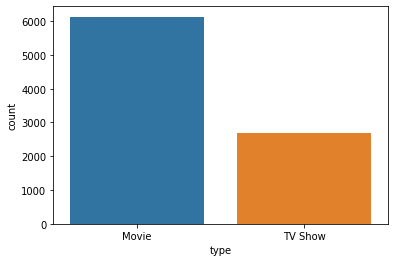

In [7]:
print(data["type"].value_counts()) #number of types of contents and their counts
sns.countplot(x = data["type"])
plt.show()

In [8]:
data = data.sort_values(by = "release_year", ascending = False).reset_index() #sorted by release years
data.head(3)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
1,781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
2,762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...


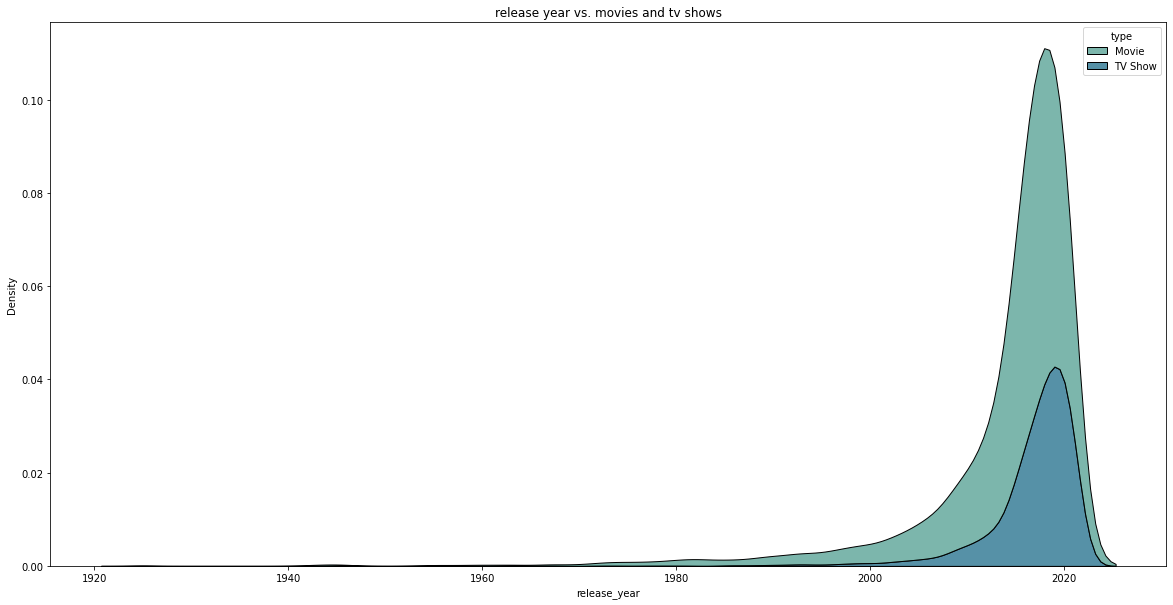

In [11]:
plt.figure(figsize = (20, 10))
sns.kdeplot(data = data, x = "release_year", hue = "type", multiple = "stack", palette = "crest")
plt.title("release year vs. movies and tv shows")
plt.show()

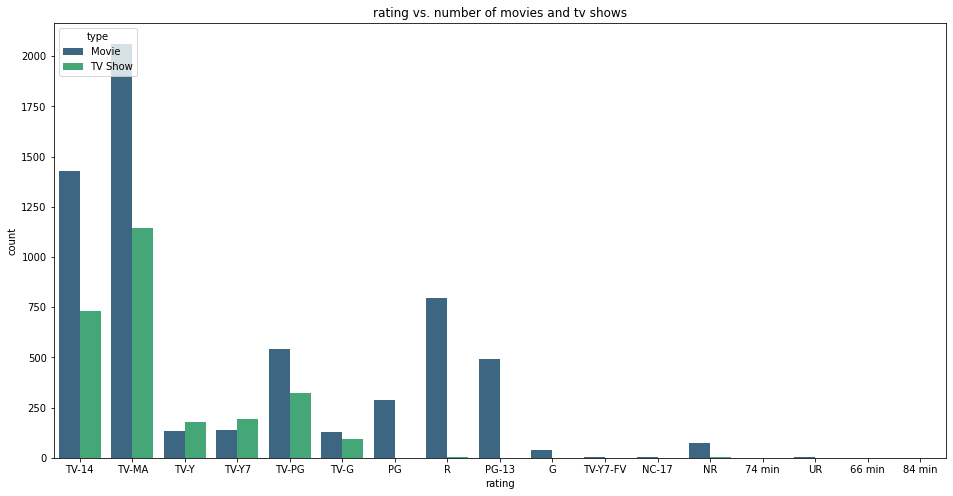

In [12]:
plt.figure(figsize = (16, 8))
sns.countplot(data = data, x = "rating", hue = "type", palette = "viridis")
plt.title("rating vs. number of movies and tv shows")
plt.show()

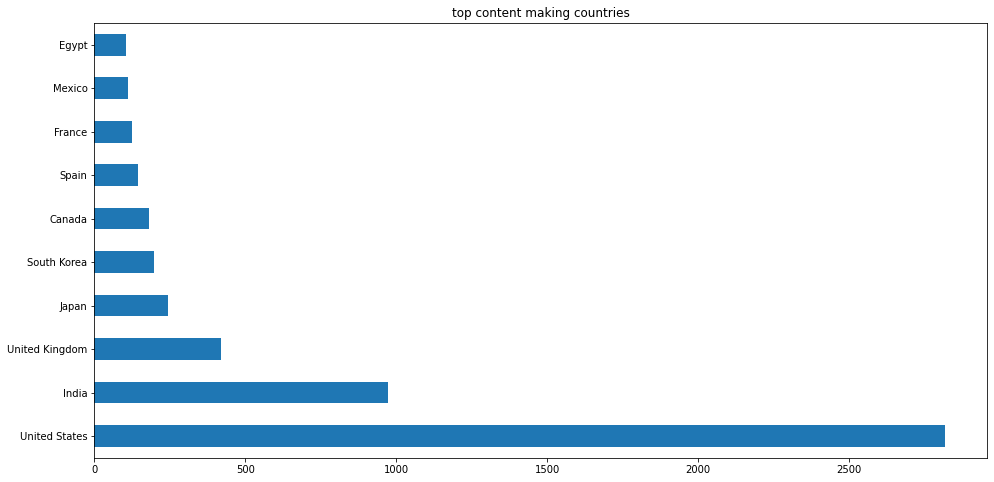

In [13]:
top10_countries = data["country"].value_counts().sort_values(ascending = False)
plt.figure(figsize = (16, 8))
top10_countries[:10].plot(kind = "barh")
plt.title("top content making countries")
plt.show()

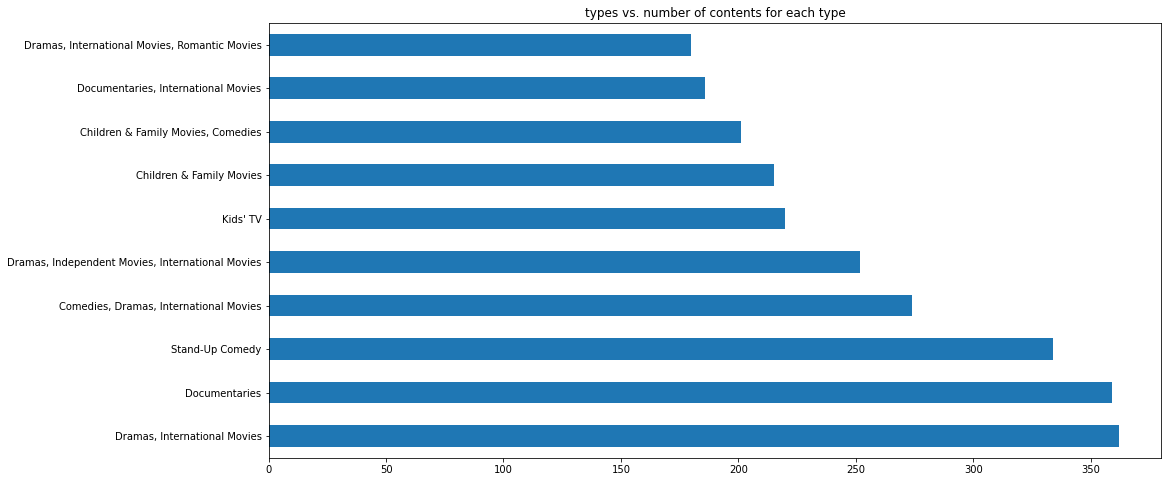

In [14]:
plt.figure(figsize = (16, 8))
data["listed_in"].value_counts()[:10].plot(kind = "barh")
plt.title("types vs. number of contents for each type")
plt.show()

# Recommender system

In [15]:
selected_features = ["type", "title", "director", "cast", "country", "date_added", "release_year", "rating", "duration", "listed_in"]
for feature in selected_features:
    data[feature] = data[feature].fillna('') #removing NaN values

In [16]:
data.isnull().sum()

index           0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
new_feature = []
for i in data.index[:]:
    instance = ''
    for feature in selected_features:
        instance = instance + ' ' + str(data[feature].values[i])
        instance = instance.strip(' ').replace(',', '').lower()
    new_feature.append(instance) #making the new feature

In [18]:
data["combined_feature"] = new_feature
data.head(3)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_feature
0,693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",movie ali & ratu ratu queens lucky kuswandi iq...
1,781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,,,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,movie black holes | the edge of all we know pe...
2,762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,movie sweet & sour lee kae-byeok jang ki-yong ...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#converting the strings to machine recognizable format
X = vectorizer.fit_transform(data["combined_feature"])
print(X.toarray().shape) #shape of the array

(8807, 41651)


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(X) #calculating pairwise cosine similarity

In [33]:
def recommend(user_input, num_of_rec):
    try:
        user_input_index = data[data.title == user_input]["index"].values[0]
        similar_contents = list(enumerate(similarity[user_input_index]))
        similar_contents_sorted = sorted(similar_contents, key = lambda x: x[1], reverse = True)[1:]
        count = 0
        print(f"According to the previously watched content named: {user_input}, you may like to watch: ")
        for element in similar_contents_sorted:
            #print(get_title(data, element[0]))
            print(data[data.index == element[0]]["title"].values[0])
            count += 1
            if count >= num_of_rec:
                break
    except:
        print("Sorry, no recommendations!")

In [39]:
content_input = str(input("Enter a movie or tv show name you like: "))
num_of_rec = int(input("How many recommendations you want to get? "))
recommend(content_input, num_of_rec)

Enter a movie or tv show name you like:  Twilight
How many recommendations you want to get?  10


According to the previously watched content named: Twilight, you may like to watch: 
Titletown High
Sexy Beasts
Big Timber
Khawatir
The Big Day
Blown Away
Comedy Premium League
Glow Up
Marriage or Mortgage
The Wedding Coach
